In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from skbio.stats.composition import ilr
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement
import seaborn as sns
from matplotlib import rcParams
sns.set()
sns.set(font_scale=1.5)

## Dataframe Containing Unique TigrFams in order to build new Dataframe

In [3]:
tigrDF = pd.read_csv("./DataFiles/Dataframes/functionalAnalysis/master_TIGRBinary.csv").set_index("Unnamed: 0")
tigrDF.head()

,TIGR02497,TIGR00366,TIGR02778,TIGR00283,TIGR02100,TIGR02359,TIGR00224,TIGR00745,TIGR00260,TIGR04171,...,TIGR02723,TIGR00100,TIGR01295,TIGR03494,TIGR02795,TIGR04431,TIGR01733,TIGR01685,TIGR02956,TIGR00967
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Clostridioides_difficile_QCD66c26,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,2,0,0,1
Bacillus_cereus_m1293_strainm1293,0,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,0,3,0,0,2
Bacillus_mycoides_DSM_2048_strainDSM_2048,0,0,0,0,0,0,1,2,1,1,...,0,0,0,0,0,0,12,0,0,2
Bacillus_cereus_AH1273_strainAH1273,0,0,0,0,0,0,1,2,1,1,...,0,0,0,0,0,0,3,0,0,2
Bacillus_pseudofirmus_OF4_strainOF4,0,0,1,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1


## Average Read Length Per Sample

In [4]:
import json
averageReadLength = {}
with open("./DataFiles/CohortInformation/sampleAverageReadLength.txt", 'r') as f:
        averageReadLength = json.load(f)

## Build Empty TigrFam Dataframe: Fill dataframe on Coombs

In [5]:
emptyTigrDf = pd.DataFrame(index=list(averageReadLength.keys()), columns=list(tigrDF.columns))
emptyTigrDf.index.name = 'SampleName'
emptyTigrDf.fillna(0.0, inplace=True)
emptyTigrDf.head()

,TIGR02497,TIGR00366,TIGR02778,TIGR00283,TIGR02100,TIGR02359,TIGR00224,TIGR00745,TIGR00260,TIGR04171,...,TIGR02723,TIGR00100,TIGR01295,TIGR03494,TIGR02795,TIGR04431,TIGR01733,TIGR01685,TIGR02956,TIGR00967
SampleName,,,,,,,,,,,,,,,,,,,,,
SRS024132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRS024265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRS019582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRS011061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRS020233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build Strain lists per cohort

In [8]:
indianStrains = pd.read_csv('./DataFiles/Dataframes/strainDataframes/masterIndian_allStrains.csv').set_index("SampleName")
americanStrains = pd.read_csv('./DataFiles/Dataframes/strainDataframes/masterAmerican_allStrains.csv').set_index("SampleName")
europeanStrains = pd.read_csv('./DataFiles/Dataframes/strainDataframes/masterEuropean_allStrains.csv').set_index("SampleName")
japaneseStrains = pd.read_csv('./DataFiles/Dataframes/strainDataframes/masterJapanese_allStrains.csv').set_index("SampleName")

In [9]:
americanStrainList = [k for k in americanStrains.columns]
indianStrainList = [k for k in indianStrains.columns]
europeanStrainList = [k for k in europeanStrains.columns]
japaneseStrainList = [k for k in japaneseStrains.columns]

In [10]:
def writeList(listt, filename):
    with open("./DataFiles/Dataframes/functionalAnalysis/"+filename, "a+") as file:
        for item in listt:
            file.write(item+"\n")
        file.close()

In [11]:
#writeList(americanStrainList, "American_Strains.txt")
#writeList(indianStrainList, "Indian_Strains.txt")
#writeList(europeanStrainList, "European_Strains.txt")
#writeList(japaneseStrainList, "Japanese_Strains.txt")

## Import CheckM for all Strains

In [12]:
import itertools
fastaDictionary = {}
dirtyFasta = {}
with open("./DataFiles/Dataframes/fastaToName.txt") as fastName:
    for line1,line2,line3 in itertools.zip_longest(*[fastName]*3):
        if '_PLASMID' in line2:
            dirtyFasta[line1.split("==>")[1].split("<==")[0].split(".fasta")[0].strip()] = line2.split("org:")[1].split("_PLASMID")[0].strip()
            fastaDictionary[line1.split("==>")[1].split("<==")[0].split(".fasta")[0].strip()] = line2.split("org:")[1].split("_PLASMID")[0].replace("*","X").replace("#","").replace(",","").replace("'","").replace(";","").replace("(","").replace(")","").strip()
        else:
            dirtyFasta[line1.split("==>")[1].split("<==")[0].split(".fasta")[0].strip()] = line2.split("org:")[1].strip()
            fastaDictionary[line1.split("==>")[1].split("<==")[0].split(".fasta")[0].strip()] = line2.split("org:")[1].replace(",","").replace("*","X").replace("#","").replace("'","").replace(";","").replace("(","").replace(")","").strip()
del fastaDictionary['GCF_000162015.1_ASM16201v1_genomic']
del fastaDictionary['GCF_001879645.1_ASM187964v1_genomic']
del dirtyFasta['GCF_000162015.1_ASM16201v1_genomic']
del dirtyFasta['GCF_001879645.1_ASM187964v1_genomic']

In [13]:
ConvertDirty = {dirtyFasta[x]:fastaDictionary[y] for (x,y) in zip(fastaDictionary.keys(), dirtyFasta.keys())}
ConvertDirty

{'Clostridioides_difficile_QCD66c26': 'Clostridioides_difficile_QCD66c26',
 'Bacillus_cereus_m1293_strainm1293': 'Bacillus_cereus_m1293_strainm1293',
 'Bacillus_mycoides_DSM_2048_strainDSM_2048': 'Bacillus_mycoides_DSM_2048_strainDSM_2048',
 'Bacillus_cereus_AH1273_strainAH1273': 'Bacillus_cereus_AH1273_strainAH1273',
 'Bacillus_pseudofirmus_OF4_strainOF4': 'Bacillus_pseudofirmus_OF4_strainOF4',
 'Corynebacterium_jeikeium_K411': 'Corynebacterium_jeikeium_K411',
 'Ureaplasma_parvum_serovar_3_str_ATCC_700970_strainATCC_700970': 'Ureaplasma_parvum_serovar_3_str_ATCC_700970_strainATCC_700970',
 'Yersinia_pestis_KIM10': 'Yersinia_pestis_KIM10',
 'Escherichia_coli_O157:H7_str_EDL933_strainEDL933': 'Escherichia_coli_O157:H7_str_EDL933_strainEDL933',
 'Chlamydia_muridarum_str_Nigg_strainNigg': 'Chlamydia_muridarum_str_Nigg_strainNigg',
 'Xylella_fastidiosa_9a5c_strain9a5c': 'Xylella_fastidiosa_9a5c_strain9a5c',
 'Vibrio_cholerae_O1_biovar_El_Tor_str_N16961_strainN16961': 'Vibrio_cholerae_O1_bi

In [14]:
allCheck = {}
completedCheck = {}
with open("./DataFiles/checkM/checkall.txt") as slurmOut:
    for line in slurmOut:
        try:
            if '(UID' in line:
                completedCheck[line.strip().split(" ")[0].strip()] = float((">>".join(line.split())).split(">>")[12].strip())
                allCheck[fastaDictionary[line.strip().split(" ")[0].strip()]] = float((">>".join(line.split())).split(">>")[12].strip())
        except:
            continue
allCheck    

{'Serratia_proteamaculans_568_strain568': 100.0,
 'Frankia_sp_EAN1pec_strainEAN1pec': 100.0,
 'Escherichia_coli_B_str_REL606_strainREL606': 100.0,
 'Pseudothermotoga_lettingae_TMO_strainTMO': 100.0,
 'Leptospira_biflexa_serovar_Patoc_strain_Patoc_1_Paris_strainPatoc_1_Paris': 100.0,
 'Xanthobacter_autotrophicus_Py2_strainPy2': 100.0,
 'Leptospira_biflexa_serovar_Patoc_strain_Patoc_1_Ames_strainPatoc_1_Ames': 100.0,
 'Parvibaculum_lavamentivorans_DS1_strainDS1': 100.0,
 'Ochrobactrum_anthropi_ATCC_49188_strainATCC_49188': 100.0,
 'Marinomonas_sp_MWYL1_strainMWYL1': 100.0,
 'Phenylobacterium_zucineum_HLK1_strainHLK1': 100.0,
 'Actinobacillus_succinogenes_130Z_strain130Z': 100.0,
 'Pseudomonas_aeruginosa_PA7_strainPA7': 100.0,
 'Coxiella_burnetii_Dugway_5J108111_strainDugway_5J108111': 100.0,
 'Streptococcus_gordonii_str_Challis_substr_CH1_strainChallis_substr_CH1': 100.0,
 'Thermotoga_petrophila_RKU1_strainRKU1': 100.0,
 'Mycolicibacterium_gilvum_PYRGCK_strainPYRGCK': 100.0,
 'Klebsiella

Out of a total of10839 Genomes.
There are 38 (0.004%) genomes below 70% completion.
The genome with the least amount of completion is 0.0% Complete (CheckM has no data on this lineage).


(-5.0, 100.0)

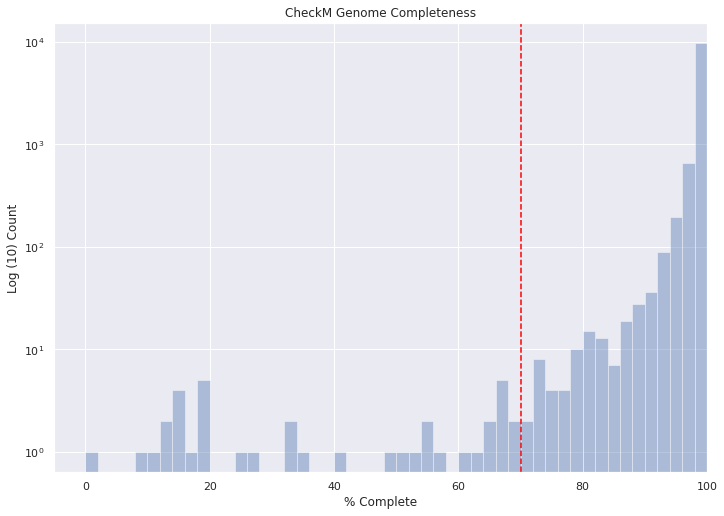

In [15]:
belowThresh = [x for x in list(completedCheck.values()) if x < 70]
print("Out of a total of"+str(len(completedCheck.values()))+" Genomes.")
print("There are "+str(len(belowThresh))+" ("+str(round(len(belowThresh)/len(completedCheck.values()),3))+"%) genomes below 70% completion.")
print("The genome with the least amount of completion is "+str(min(completedCheck.values()))+"% Complete (CheckM has no data on this lineage).")
sns.set()
rcParams['figure.figsize'] = 11.7,8.27


ax = sns.distplot(list(allCheck.values()), kde=False)
plt.ylabel('Log (10) Count')
plt.xlabel("% Complete")
plt.title("CheckM Genome Completeness")
plt.yscale("log")
plt.axvline(x=70, ymin=0, ymax=1, color='red', linestyle='--')
plt.xlim(min(allCheck.values())-5, max(allCheck.values()))

## Look at individual Cohort Strain Completeness

In [16]:
def pullStrainCompleteness(listt, cohortname):
    tempDictionary = {"Strain":[], 'Completeness':[], 'Cohort':[]}
    for strain in listt:
        tempDictionary["Strain"].append(strain)
        tempDictionary["Completeness"].append(float(allCheck[ConvertDirty[strain]]))
        tempDictionary["Cohort"].append(cohortname)
        
    tempDF = pd.DataFrame(data=tempDictionary)
    tempDF.set_index("Strain", inplace=True)
    return(tempDF)

In [17]:
def exploreCheckM(df, cohortName):
    ax = sns.distplot(df['Completeness'], kde=False)
    plt.ylabel('Log (10) Count')
    plt.xlabel("% Complete")
    plt.title(cohortName+" Cohort CheckM Strain Genome Completeness")
    plt.yscale("log")
    plt.axvline(x=70, ymin=0, ymax=1, color='red', linestyle='--')
    plt.xlim(min(df['Completeness'])-5, max(df['Completeness']))

    belowThresh = [x for x in list(df['Completeness']) if x < 70]
    belowThresh2 = [x for x in list(df['Completeness']) if x < 90]

    print("Out of a total of "+str(len(df))+" Genomes.")
    print("There are "+str(len(belowThresh))+" ("+str(round(len(belowThresh)/len(df),3))+"%) genomes below 70% completion.")
    print("There are "+str(len(belowThresh2))+" ("+str(round(len(belowThresh2)/len(df),3))+"%) genomes below 90% completion.")

In [18]:
americanCDF = pullStrainCompleteness(americanStrainList, 'American')
indianCDF = pullStrainCompleteness(indianStrainList, 'Indian')
europeanCDF = pullStrainCompleteness(europeanStrainList, 'European')
japaneseCDF = pullStrainCompleteness(japaneseStrainList, 'Japanese')

Out of a total of 1487 Genomes.
There are 7 (0.005%) genomes below 70% completion.
There are 22 (0.015%) genomes below 90% completion.


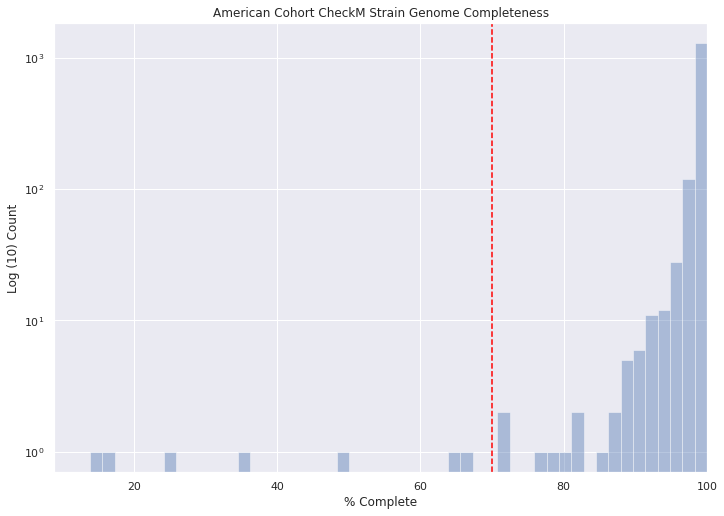

In [19]:
exploreCheckM(americanCDF, "American")

Out of a total of 1962 Genomes.
There are 16 (0.008%) genomes below 70% completion.
There are 36 (0.018%) genomes below 90% completion.


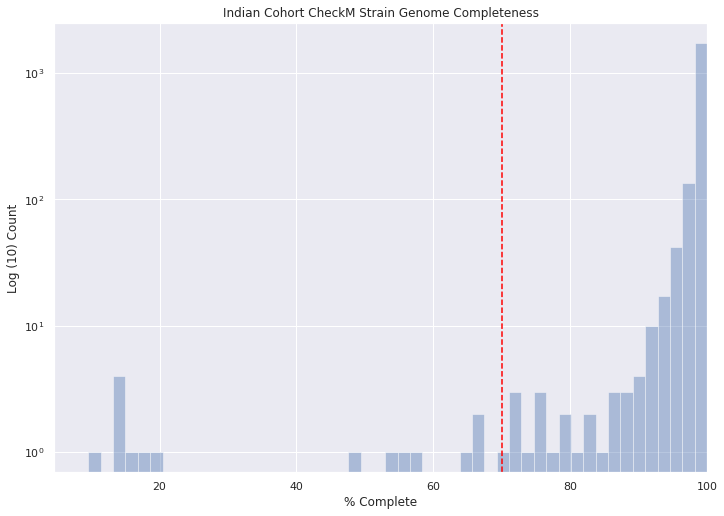

In [20]:
exploreCheckM(indianCDF, "Indian")

Out of a total of 1884 Genomes.
There are 13 (0.007%) genomes below 70% completion.
There are 37 (0.02%) genomes below 90% completion.


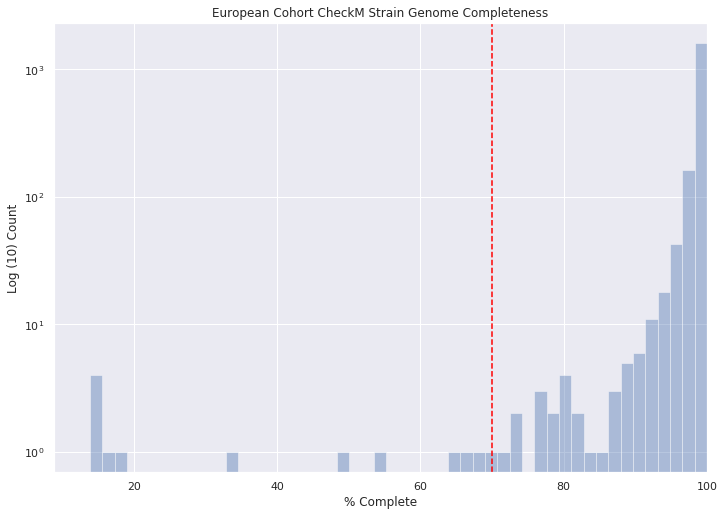

In [21]:
exploreCheckM(europeanCDF, "European")

Out of a total of 2011 Genomes.
There are 3 (0.001%) genomes below 70% completion.
There are 16 (0.008%) genomes below 90% completion.


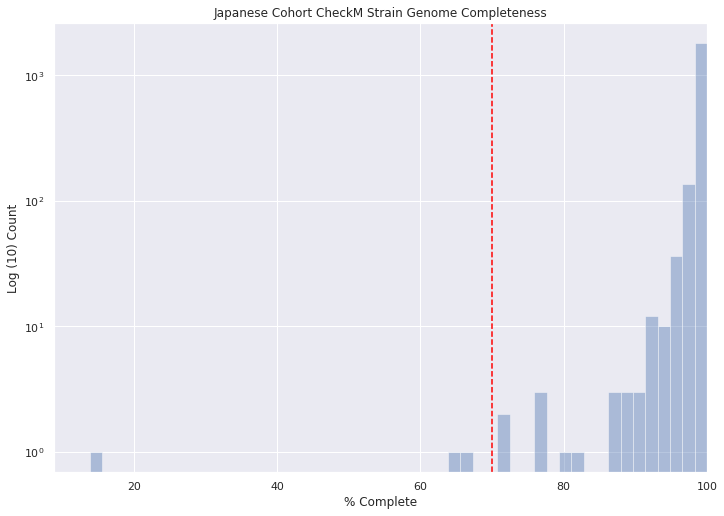

In [22]:
exploreCheckM(japaneseCDF, "Japanese")